<a href="https://colab.research.google.com/github/SeryeongLee/-/blob/main/try2(210423).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 신용카드 사용자 연체 예측 AI 경진대회

**overview**  
데이콘 - https://dacon.io/competitions/official/235713/overview/description/  
신용카드 사용자 데이터를 보고 사용자의 대금 연체 정도를 예측하는 알고리즘 개발 

**Data Fields**

index

gender: 성별

car: 차량 소유 여부

reality: 부동산 소유 여부

child_num: 자녀 수

income_total: 연간 소득

income_type: 소득 분류

edu_type: 교육 수준

family_type: 결혼 여부

house_type: 생활 방식

DAYS_BIRTH: 출생일

DAYS_EMPLOYED: 업무 시작일

FLAG_MOBIL: 핸드폰 소유 여부

work_phone: 업무용 전화 소유 여부

phone: 가정용 전화 소유 여부

email: 이메일 소유 여부

occyp_type: 직업 유형													

family_size: 가족 규모

begin_month: 신용카드 발급 월  
데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미


credit: 사용자의 신용카드 대금 연체를 기준의 신용도(타겟변수)  
=> 낮을 수록 높은 신용의 신용카드 사용자를 의미함


## 라이브러리 및 데이터  
## Library & Data

In [1]:
# import packages
import pylab

""""
pylab = matplotlib.pyplot + numpy
        - interactive 환경 (shell, ipython 등) 에서만 pylab 사용하고, 
        프로그래밍시에는  각각 matplotlib.pyplot , numpy 로 구분하여 사용해라.
"""

import numpy as np
import pandas as pd
import seaborn as sns
# from scipy import stats # 확률분포 분석
import missingno as msno # 결측치 시각화
import matplotlib.pyplot as plt
import warnings
# 경고를 끈다
pd.options.mode.chained_assignment = None
# 경고 메세지 무시
warnings.filterwarnings("ignore", category=DeprecationWarning)
# 노트북을 실행한 브라우저에서 그림 등을 볼 수 있게 함
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss

# classifier models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier



In [2]:
!pip install catboost

     |████████████████████████████████| 67.3MB 46kB/s 


In [3]:
from catboost import CatBoostClassifier

### load data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
train=pd.read_csv("/content/drive/MyDrive/creditcard/open/train.csv")
test=pd.read_csv("/content/drive/MyDrive/creditcard/open/test.csv")
submission=pd.read_csv("/content/drive/MyDrive/creditcard/open/sample_submission.csv")

pd.set_option('display.max_columns',500)

# 데이터 살펴보기

In [6]:
train.shape, test.shape

((26457, 20), (10000, 19))

In [7]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [8]:
test.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
3,26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
4,26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [10]:
# 전체 피처의 타입 확인
print('\n전체 피처의 type \n', train.dtypes.value_counts())


전체 피처의 type 
 int64      8
object     8
float64    4
dtype: int64


In [11]:
# check train unique 
train_unique= train.apply(lambda x : x.unique())
train_unique

index            [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
gender                                                      [F, M]
car                                                         [N, Y]
reality                                                     [N, Y]
child_num                            [0, 1, 2, 3, 4, 5, 14, 19, 7]
income_total     [202500.0, 247500.0, 450000.0, 157500.0, 27000...
income_type      [Commercial associate, Working, State servant,...
edu_type         [Higher education, Secondary / secondary speci...
family_type      [Married, Civil marriage, Separated, Single / ...
house_type       [Municipal apartment, House / apartment, With ...
DAYS_BIRTH       [-13899, -11380, -19087, -15088, -15037, -1341...
DAYS_EMPLOYED    [-4709, -1540, -4434, -2092, -2105, -4996, -19...
FLAG_MOBIL                                                     [1]
work_phone                                                  [0, 1]
phone                                                       [0

FLAG_MOBILE은 모두 1이다. 즉, 모두 핸드폰을 가지고 있다.  


## 데이터 전처리
## Data Cleansing & Pre-Processing

#### 1. 결측치 제거

결측치 확인

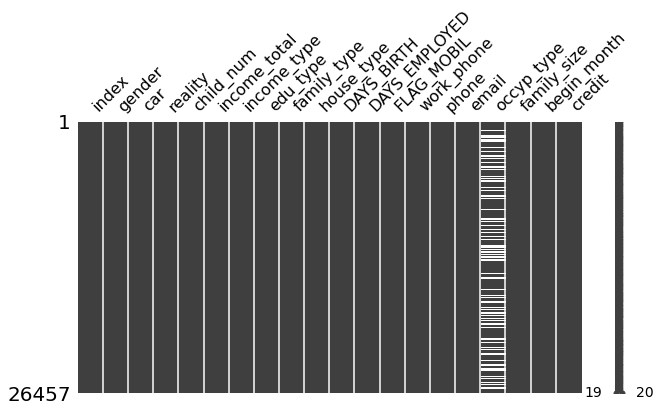

In [12]:
# 결측값 시각화로 확인
msno.matrix(train, figsize=(10,5))

In [13]:
train.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

occyp_type에서 결측값이 존재한다.

In [14]:
train['occyp_type'].unique()

array([nan, 'Laborers', 'Managers', 'Sales staff',
       'High skill tech staff', 'Core staff', 'Drivers', 'Medicine staff',
       'Accountants', 'Realty agents', 'Security staff', 'Cleaning staff',
       'Private service staff', 'Cooking staff', 'Secretaries',
       'HR staff', 'IT staff', 'Low-skill Laborers',
       'Waiters/barmen staff'], dtype=object)

In [15]:
# occyp_type 칼럼 삭제하기
# 이유는 occyp_type이 factor형태의 데이터이기 때문에 값을 대체하기 어렵기 때문이다.
# 또한 결측값이 8171로 많이 존재하기 때문이다.
train=train.drop("occyp_type",axis=1)
# test set에도 똑같이 적용
test=test.drop("occyp_type",axis=1)

In [16]:
# occyp_type 제거 후 결측치 확인
train.isnull().sum()

index            0
gender           0
car              0
reality          0
child_num        0
income_total     0
income_type      0
edu_type         0
family_type      0
house_type       0
DAYS_BIRTH       0
DAYS_EMPLOYED    0
FLAG_MOBIL       0
work_phone       0
phone            0
email            0
family_size      0
begin_month      0
credit           0
dtype: int64

결측치 제거됨  
고민할 점 -> NaN으로 대체하면 어떻게 되는거지?

#### 2. target 변수 credit 비율 살펴보기

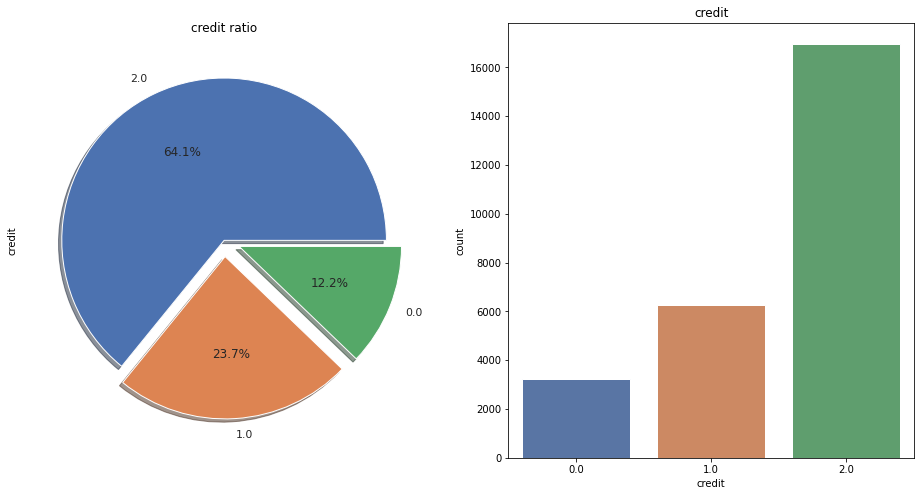

In [17]:
f, ax = plt.subplots(1, 2, figsize=(16,8))
sns.set_theme(style="darkgrid")
train['credit'].value_counts().plot.pie(explode=[0,0.1, 0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('credit ratio')
sns.countplot( x='credit',data=train,ax=ax[1])
ax[1].set_title('credit')
plt.show()

credit이 낮을수록 높은 신용을 뜻하므로 낮은 신용을 가진 사람들이 많다.

#### 3. 명목형 EDA  
각 명목형 변수 별 credit

명목형 변수는 따로 처리할 게 없는 듯하다.

#### 4. 수치형 EDA

1) 수치형 변수의 분포를 histogram으로 확인

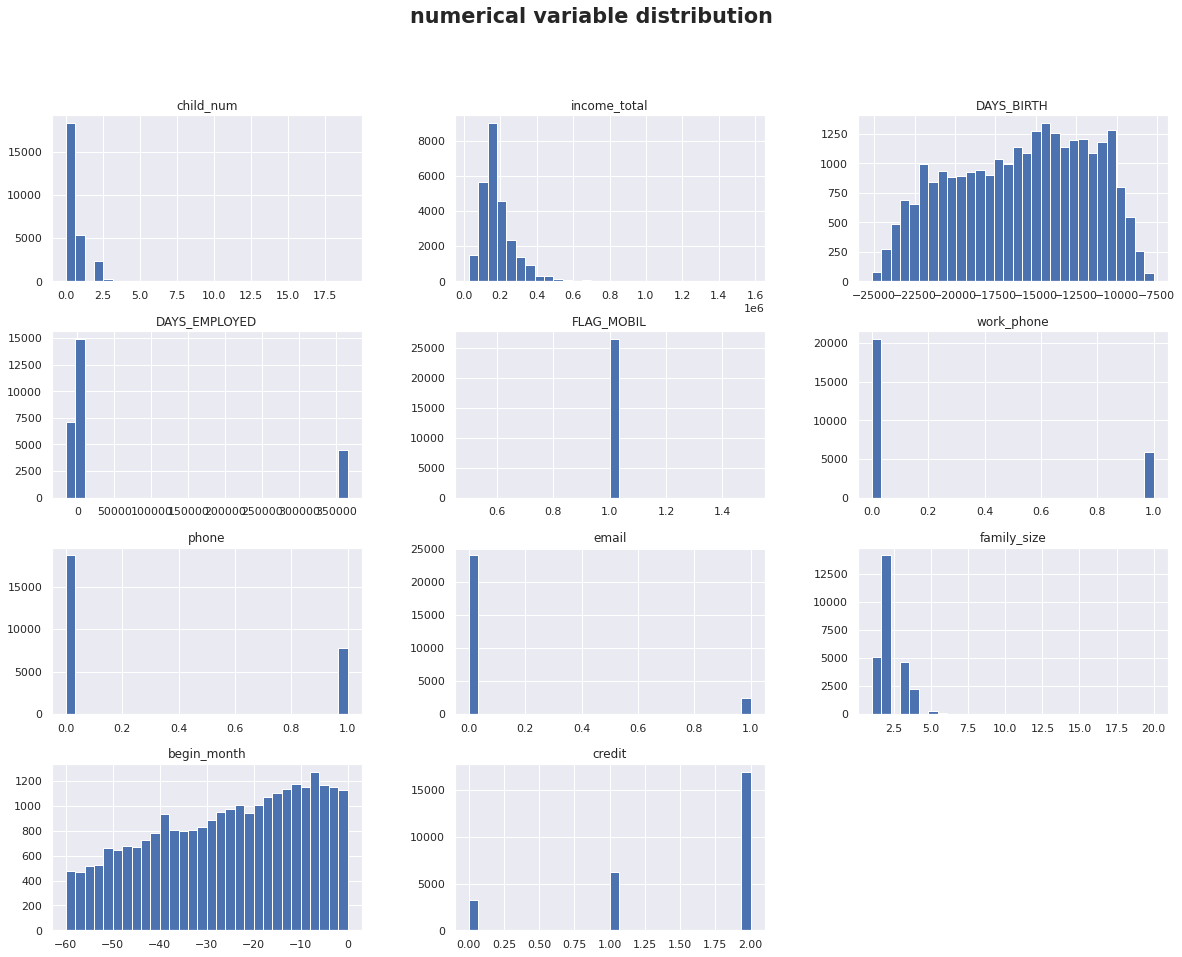

In [18]:
g = train.set_index('index').hist(bins=30,figsize=(20,15))
plt.suptitle("numerical variable distribution",fontsize='xx-large',fontweight=800)
plt.show()

DAYS_BIRTH,DAYS_EMPLOYED,begin_month는 변수 설명에서 보듯이 음수이므로 값을 변경해준다.  
income_total은 히스토그램을 보면 skewed된 자료인 것으로 보인다. 이것은 신용도에 영향을 끼치는 중요한 속성으로 판단되어 정규분포 형태로 변환해준다.

2) 수치형 변수 간의 상관관계

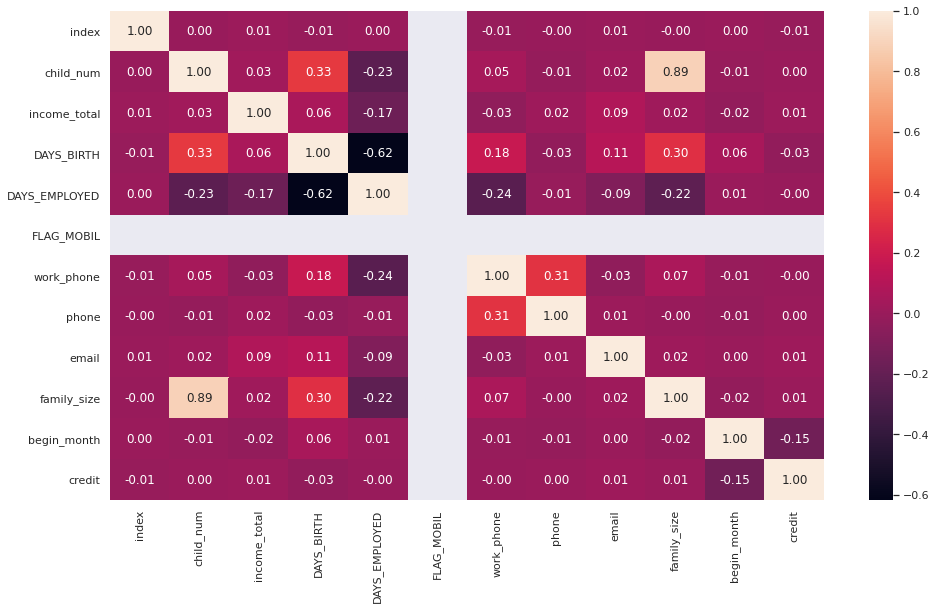

In [19]:
plt.figure(figsize=(16,9))
sns.heatmap(train.corr(),annot=True,fmt="0.2f")

family size와 child_num의 상관계수는 0.89로 높다.  
상관계수가 높은 이유로는 family_size = child_num + adult_num 이니까 그럴 것이라 예상된다. 하지만 어른과 아이의 수가 신용도에 큰 영향은 없을 것으로 판단해 칼럼을 그냥 둔다.

3) 이상치 확인

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Child Num'),
 Text(0.5, 1.0, 'Box Plot On Child Num')]

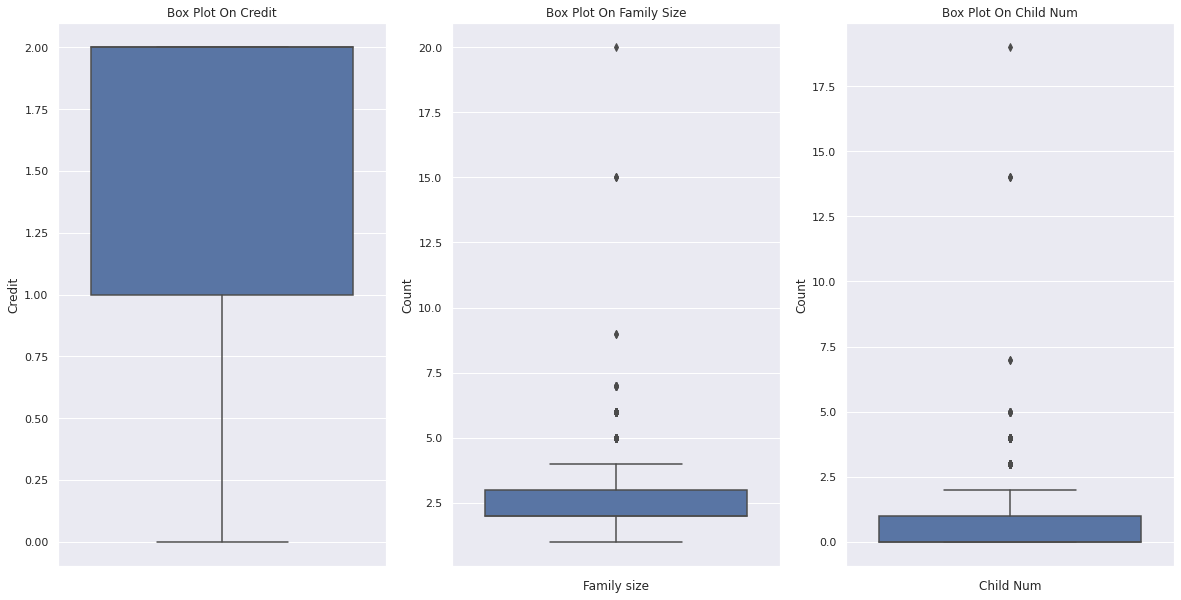

In [20]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(20, 10)
sns.boxplot(data=train,y="credit",orient="v",ax=ax1)
sns.boxplot(data=train,y="family_size",orient="v",ax=ax2)
sns.boxplot(data=train,y="child_num",orient="v",ax=ax3)
ax1.set(ylabel='Credit',title="Box Plot On Credit")
ax2.set(xlabel='Family size', ylabel='Count',title="Box Plot On Family Size")
ax3.set(xlabel='Child Num', ylabel='Count',title="Box Plot On Child Num")

child_num은 이상값을 처리해 사용하는 것이 좋을 것 같지만  
family_size는 이상치여도 신용도에 영향을 미칠 것 같아 이상값을 처리하지 않을 것이다.

### 피처 엔지니어링

1) income_total 변환

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


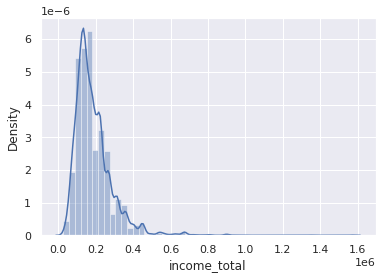

In [21]:
tr_it=train['income_total']
sns.distplot(tr_it)

right-skewed distribution -> 로그 변환으로 정규 분포 형태로 만들어주기

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


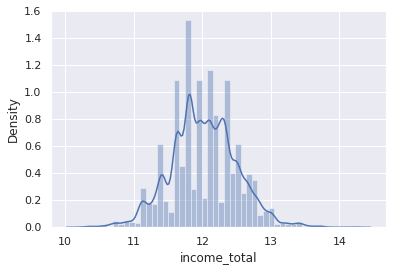

In [22]:
tr_it_log = np.log1p(tr_it)
sns.distplot(tr_it_log)
# train에 로그변환한 변수로 바꾸기
# train['income_total']= tr_it_log

전보다 왜곡 정도가 좋아졌다.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


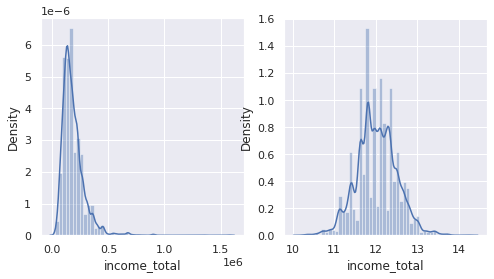

In [23]:
# test set에도 적용
te_it=test['income_total']
te_it_log = np.log1p(te_it)
fig, (ax1,ax2) = plt.subplots(ncols=2)
fig.set_size_inches(8,4)
sns.distplot(te_it,ax=ax1)
sns.distplot(tr_it_log,ax=ax2)
# change cols
# test['income_total']=te_it_log

target변수가 아닌 변수는 로그변환해도 성능에 큰 영향을 주지 않는 것 같아서 변수 추가 안함.

2) child_num - 범주화(3개)

In [24]:
# check child num counts
train['child_num'].value_counts(sort=True)

In [24]:
train.loc[train['child_num']>=3,'child_num']=3
test.loc[test['child_num']>=3,'child_num']=3

In [25]:
# 3 이상 값 합친 후 확인
train['child_num'].value_counts()

3) 값의 대부분이 음수인 변수들

In [26]:
# DAYS_EMPLOYED에서 양수(일하지 않는 사람)를 0으로 대체
train['DAYS_EMPLOYED']= train['DAYS_EMPLOYED'].map(lambda x: 0 if x>0 else x)
test['DAYS_EMPLOYED']= test['DAYS_EMPLOYED'].map(lambda x: 0 if x>0 else x)

In [27]:
train['EMPLOYED']= train.DAYS_EMPLOYED.apply(lambda x: abs(x/360) )
train['age']= train.DAYS_BIRTH.apply(lambda x: abs(x/360) ).astype(int)
train['begin_month']= train.begin_month.apply(lambda x: abs(x) ).astype(int)

In [28]:
test['EMPLOYED']= test.DAYS_EMPLOYED.apply(lambda x: abs(x/360) )
test['age']= test.DAYS_BIRTH.apply(lambda x: abs(x/360) ).astype(int)
test['begin_month']= test.begin_month.apply(lambda x: abs(x) ).astype(int)

In [29]:
# 변경 변수 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  family_size    26457 non-null  float64
 17  begin_month    26457 non-null  int64  
 18  credit

In [30]:
# 원데이터 삭제
train=train.drop(['DAYS_EMPLOYED','DAYS_BIRTH'],axis=1)
test=test.drop(['DAYS_EMPLOYED','DAYS_BIRTH'],axis=1)

Show Numerical Histogram after adding transformed variables. 


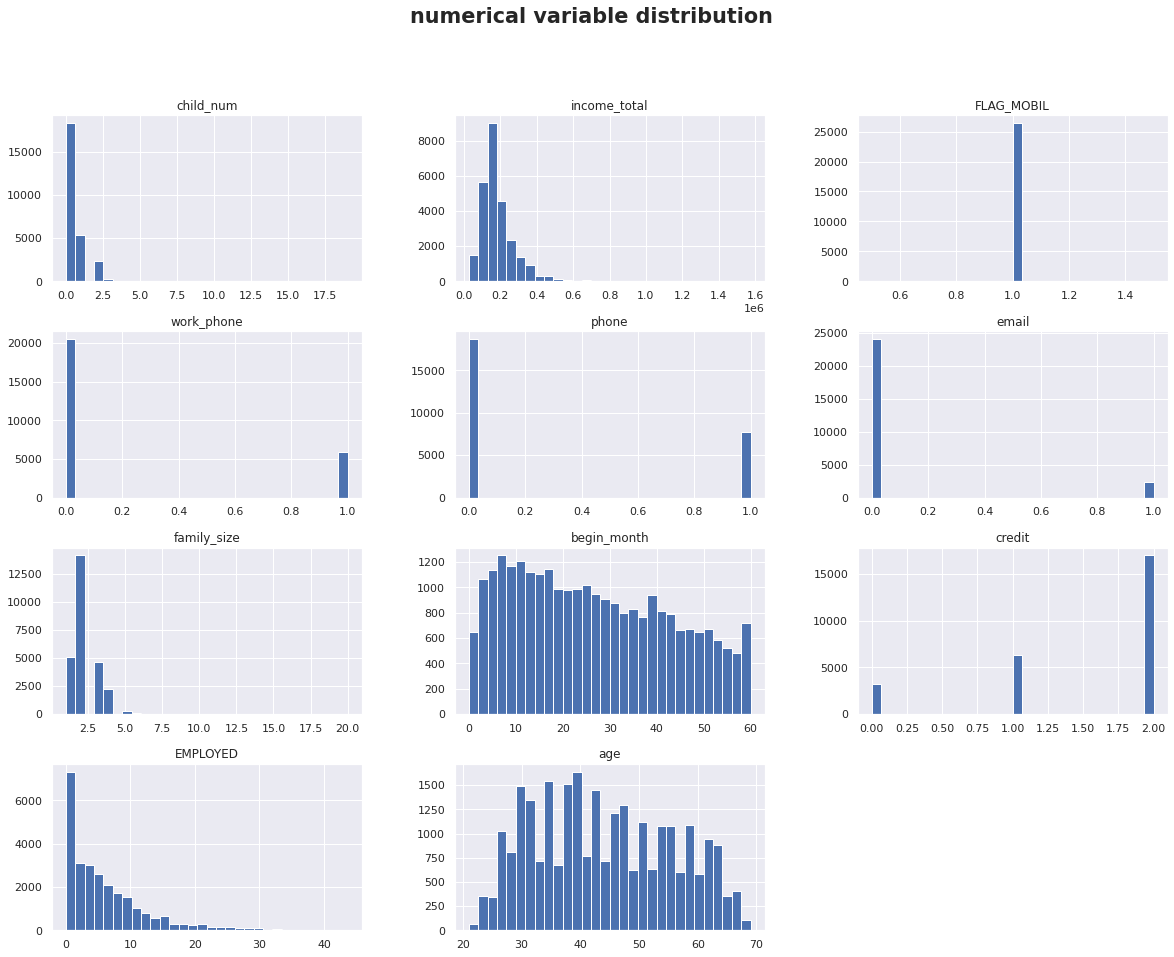

In [31]:
g = train.set_index('index').hist(bins=30,figsize=(20,15))
plt.suptitle("numerical variable distribution",fontsize='xx-large',fontweight=800)
plt.show()

원-핫 인코딩  
명목형 변수들 처리

In [32]:
# 데이터 타입이 'object'인 변수들을 리스트에 담기
obj_col = []
for col in train.columns:
  if train[col].dtype=='object':
    obj_col.append(col)

원-핫 인코딩 다른 방법  
train_ohe=pd.get_dummies(train,columns=obj_col)  
test_ohe=pd.get_dummies(test,columns=obj_col)  
train_e= train_ohe.iloc[:12]  
test_e=test_ohe.iloc[:,12]  

In [33]:
# 함수를 만들어 원-핫 인코딩을 해주었다.
def dummy_data(data, columns):  
    for column in columns:  
        data = pd.concat([data, pd.get_dummies(data[column], prefix = column)], axis=1)
        data = data.drop(column, axis=1)  
    return data  
train_ohe = dummy_data(train, obj_col)  
test_ohe = dummy_data(test, obj_col)  

explore train data and test data after one-hot encoding


In [34]:
train_ohe.head()

,index,child_num,income_total,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit,EMPLOYED,age,gender_F,gender_M,car_N,car_Y,reality_N,reality_Y,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,family_type_Civil marriage,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents
0,0,0,202500.0,1,0,0,0,2.0,6,1.0,13.080556,38,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,1,1,247500.0,1,0,0,1,3.0,5,1.0,4.277778,31,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0
2,2,0,450000.0,1,0,1,0,2.0,22,2.0,12.316667,53,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
3,3,0,202500.0,1,0,1,0,2.0,37,0.0,5.811111,41,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
4,4,0,157500.0,1,0,0,0,2.0,26,2.0,5.847222,41,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [35]:
test_ohe.head()

,index,child_num,income_total,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,EMPLOYED,age,gender_F,gender_M,car_N,car_Y,reality_N,reality_Y,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,family_type_Civil marriage,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents
0,26457,0,112500.0,1,0,1,0,2.0,60,0.000000,61,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0
1,26458,0,135000.0,1,0,1,0,2.0,36,24.086111,52,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,26459,0,69372.0,1,1,1,0,2.0,40,0.602778,44,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
3,26460,0,112500.0,1,1,0,0,2.0,41,7.030556,53,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
4,26461,0,225000.0,1,1,0,0,2.0,8,26.069444,49,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [36]:
# Check shape of train, test data set after one-hot encoding.
print(train_ohe.shape,test_ohe.shape)

(26457, 39) (10000, 38)


In [37]:
# 훈련을 하기 전 필요없는 칼럼을 삭제
t_train=train_ohe.drop(["index",'credit'],axis=1)
t_test=test_ohe.drop("index",axis=1)
target_train=train[['credit']]

In [38]:
# 최종 train셋 확인
t_train.head()

,child_num,income_total,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,EMPLOYED,age,gender_F,gender_M,car_N,car_Y,reality_N,reality_Y,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,family_type_Civil marriage,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents
0,0,202500.0,1,0,0,0,2.0,6,13.080556,38,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,1,247500.0,1,0,0,1,3.0,5,4.277778,31,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0
2,0,450000.0,1,0,1,0,2.0,22,12.316667,53,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
3,0,202500.0,1,0,1,0,2.0,37,5.811111,41,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
4,0,157500.0,1,0,0,0,2.0,26,5.847222,41,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [39]:
# 최종 test셋 확인
t_test.head()

,child_num,income_total,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,EMPLOYED,age,gender_F,gender_M,car_N,car_Y,reality_N,reality_Y,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,family_type_Civil marriage,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents
0,0,112500.0,1,0,1,0,2.0,60,0.000000,61,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0
1,0,135000.0,1,0,1,0,2.0,36,24.086111,52,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,0,69372.0,1,1,1,0,2.0,40,0.602778,44,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
3,0,112500.0,1,1,0,0,2.0,41,7.030556,53,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
4,0,225000.0,1,1,0,0,2.0,8,26.069444,49,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [40]:
# check shapes
print(t_train.shape,target_train.shape,t_test.shape)

(26457, 37) (26457, 1) (10000, 37)


## 데이터 모델링

split train and test sets

In [41]:
# split train and test sets
X_train, X_val, y_train, y_val = train_test_split(t_train, target_train, 
                                                    stratify=target_train, test_size=0.25,
                                                    random_state = 121)

## 모델 학습 및 검증
## Model Tuning & Evaluation

classification classifers 사용 - random forest, lgbm, xgboost, catboost  
대회평가요건이 Logloss이므로 각 모델의 Logloss를 비교하여 가장 작은 모델을 선택한다.

1) 랜덤포레스트

In [42]:
from tensorflow.keras.utils import to_categorical

rf_clf=RandomForestClassifier()
rf_clf.fit(X_train, y_train)
rf_pred=rf_clf.predict_proba(X_val)

print(f"log_loss: {log_loss(to_categorical(y_val['credit']), rf_pred)}")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


log_loss: 0.9667616221107899


2) LGBM

In [50]:
lg_clf=LGBMClassifier(n_estimators=10000)
lg_clf.fit(X_train, y_train)
lg_pred=lg_clf.predict_proba(X_val)

print(f"log_loss: {log_loss(to_categorical(y_val['credit']), lg_pred)}")

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


log_loss: 1.7805080889438374


3) XGBOOST

In [44]:
xg_clf=XGBClassifier()
xg_clf.fit(X_train, y_train)
xg_pred=xg_clf.predict_proba(X_val)

print(f"log_loss: {log_loss(to_categorical(y_val['credit']), xg_pred)}")

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


log_loss: 0.8022685547241728


4) CATBOOST

In [45]:
cat_clf=CatBoostClassifier()
cat_clf.fit(X_train, y_train)
cat_pred=cat_clf.predict_proba(X_val)

print(f"log_loss: {log_loss(to_categorical(y_val['credit']), cat_pred)}")

Learning rate set to 0.092151
0:	learn: 1.0472772	total: 55.7ms	remaining: 55.7s
1:	learn: 1.0060049	total: 68ms	remaining: 33.9s
2:	learn: 0.9733719	total: 79.4ms	remaining: 26.4s
3:	learn: 0.9460272	total: 91.3ms	remaining: 22.7s
4:	learn: 0.9235165	total: 99.9ms	remaining: 19.9s
5:	learn: 0.9048696	total: 111ms	remaining: 18.4s
6:	learn: 0.8894242	total: 124ms	remaining: 17.5s
7:	learn: 0.8769652	total: 135ms	remaining: 16.8s
8:	learn: 0.8660223	total: 146ms	remaining: 16s
9:	learn: 0.8568472	total: 161ms	remaining: 15.9s
10:	learn: 0.8489243	total: 172ms	remaining: 15.4s
11:	learn: 0.8422840	total: 183ms	remaining: 15.1s
12:	learn: 0.8365509	total: 194ms	remaining: 14.8s
13:	learn: 0.8318507	total: 208ms	remaining: 14.6s
14:	learn: 0.8281474	total: 218ms	remaining: 14.3s
15:	learn: 0.8247629	total: 229ms	remaining: 14.1s
16:	learn: 0.8218649	total: 241ms	remaining: 13.9s
17:	learn: 0.8190377	total: 252ms	remaining: 13.8s
18:	learn: 0.8165383	total: 264ms	remaining: 13.6s
19:	learn:

catboost 선택

교차검증 - StratifiedKfold사용(k=5)  
과적합을 피하고 각각 비율이 다른 클래스의 비율을 유지하면서 훈련과 테스트 세트를 분류하기 위해 StratifiedKfold 사용

In [46]:
from sklearn.model_selection import KFold, StratifiedKFold

def Kfold(cat_clf):
    folds=StratifiedKFold(n_splits=5, shuffle=True, random_state=156)
    outcomes=[]
    sub=np.zeros((t_test.shape[0], 3))  
    for n_fold, (train_index, val_index) in enumerate(folds.split(t_train, target_train)):
        X_train, X_val = t_train.iloc[train_index], t_train.iloc[val_index]
        y_train, y_val = target_train.iloc[train_index], target_train.iloc[val_index]
        cat_clf.fit(X_train, y_train)
        
        predictions=cat_clf.predict_proba(X_val)
        
        logloss=log_loss(to_categorical(y_val['credit']), predictions)
        outcomes.append(logloss)
        print(f"FOLD {n_fold} : logloss:{logloss}")
        
        sub+=cat_clf.predict_proba(t_test)
        
        
    mean_outcome=np.mean(outcomes)
    
    print("Mean:{}".format(mean_outcome))
    return sub/folds.n_splits

my_submission = Kfold(cat_clf)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
10:	learn: 0.8494818	total: 137ms	remaining: 12.3s
11:	learn: 0.8428339	total: 150ms	remaining: 12.4s
12:	learn: 0.8370856	total: 165ms	remaining: 12.5s
13:	learn: 0.8323784	total: 177ms	remaining: 12.5s
14:	learn: 0.8282698	total: 190ms	remaining: 12.4s
15:	learn: 0.8247974	total: 206ms	remaining: 12.7s
16:	learn: 0.8217436	total: 221ms	remaining: 12.8s
17:	learn: 0.8194552	total: 234ms	remaining: 12.8s
18:	learn: 0.8173152	total: 247ms	remaining: 12.8s
19:	learn: 0.8154275	total: 260ms	remaining: 12.7s
20:	learn: 0.8137091	total: 272ms	remaining: 12.7s
21:	learn: 0.8121249	total: 284ms	remaining: 12.6s
22:	learn: 0.8106966	total: 296ms	remaining: 12.6s
23:	learn: 0.8093465	total: 309ms	remaining: 12.5s
24:	learn: 0.8082390	total: 321ms	remaining: 12.5s
25:	learn: 0.8070575	total: 332ms	remaining: 12.5s
26:	learn: 0.8062251	total: 347ms	remaining: 12.5s
27:	learn: 0.8056059	total: 359ms	remaining: 12.5s
28:	learn: 0.8051079	total: 371ms	remaining: 1

In [52]:
# index 제외 후 제출
submission.loc[:,1:]=my_submission

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  


In [53]:
submission

,index,0,1,2
0,26457,0.000932,0.000202,0.998866
1,26458,0.529216,0.050100,0.420684
2,26459,0.000030,0.001437,0.998534
3,26460,0.002989,0.042312,0.954699
4,26461,0.001307,0.115694,0.883000
...,...,...,...,...
9995,36452,0.099845,0.029768,0.870387
9996,36453,0.100079,0.531936,0.367985
9997,36454,0.000023,0.000867,0.999110
9998,36455,0.498727,0.105582,0.395691


In [54]:
# csv형태로 파일 저장
submission.to_csv('cat1_submission.csv', index=False)